In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # 用于数据归一化

In [50]:
data = pd.read_csv('TrafficData.csv', encoding='utf-8')

x = data[['人数', '机动车数', '公路面积']]
y = data[['公路客运量', '公路货运量']]

In [51]:
data.head()

,年份,人数,机动车数,公路面积,公路客运量,公路货运量
0,1990,20.55,0.60,0.09,5126,1237
1,1991,22.44,0.75,0.11,6217,1379
2,1992,25.37,0.85,0.11,7730,1385
3,1993,27.13,0.90,0.14,9145,1399
4,1994,29.45,1.05,0.20,10460,1663


In [52]:
# 数据归一化处理
x_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))

x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

In [53]:
x

array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-9.05688623e-01, -8.80000000e-01, -9.42857143e-01],
       [-7.59481038e-01, -8.00000000e-01, -9.42857143e-01],
       [-6.71656687e-01, -7.60000000e-01, -8.57142857e-01],
       [-5.55888224e-01, -6.40000000e-01, -6.85714286e-01],
       [-5.23453094e-01, -4.00000000e-01, -6.00000000e-01],
       [-4.80538922e-01, -3.20000000e-01, -6.00000000e-01],
       [-3.25848303e-01, -2.00000000e-01, -3.42857143e-01],
       [-2.08083832e-01, -1.20000000e-01, -3.42857143e-01],
       [-1.24750499e-01,  2.22044605e-16, -2.85714286e-01],
       [-7.28542914e-02,  2.40000000e-01, -2.28571429e-01],
       [-2.99401198e-02,  2.80000000e-01, -2.28571429e-01],
       [ 6.68662675e-02,  3.20000000e-01, -1.71428571e-01],
       [ 1.99600798e-01,  4.00000000e-01,  1.42857143e-01],
       [ 3.34830339e-01,  5.20000000e-01,  3.42857143e-01],
       [ 6.13772455e-01,  6.00000000e-01,  4.28571429e-01],
       [ 7.55489022e-01,  6.80000000e-01

In [54]:
# 转置
sample_in=x.T
sample_out=y.T

In [55]:
#BP神经网络网络参数
max_epochs=10000 #最大循环迭代次数
learn_rate=0.03  #学习率
mse_final=7.5e-4  #设置一个均方误差（MSE）的阈值，小于它则停止迭代
sample_number=x.shape[0]  #样本规模
input_number=x.shape[1]  #输入规模
output_number=y.shape[1]  #输出规模
hidden_units=8 #隐含层（Hidden Layer）神经元个数

In [56]:
print(sample_number,input_number,output_number)

20 3 2


In [57]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

def sigmoid_delta(z): #sigmoid的偏导数
    return 1/((1+np.exp(-z))**2)*np.exp(-z)

In [58]:
#一层隐含层
#W1矩阵:M行N列，M等于该层神经元个数，N等于输入特征个数
W1=0.5*np.random.rand(hidden_units,input_number)-0.1
b1=0.5*np.random.rand(hidden_units,1)-0.1

In [59]:
W2=0.5*np.random.rand(output_number,hidden_units)-0.1
b2=0.5*np.random.rand(output_number,1)-0.1

mse_history=[]  #空列表，存储迭代的误差

In [60]:
for i in range(max_epochs):
    #训练
    hidden_out=sigmoid(np.dot(W1,sample_in)+b1)  #np.dot矩矩阵相乘,hidden_out1结果为8行20列
    network_out=np.dot(W2,hidden_out)+b2  #np.dot矩阵相乘,W2是2行8列，则output结果是2行20列
    #误差
    err=sample_out-network_out
    mse_err=np.average(np.square(err)) #均方误差
    mse_history.append(mse_err)
    if(i+1)% 100 == 0:
        print("Iter:{}次,mse_err(loss=){}".format(i+1,mse_err))
    if mse_err<mse_final:
        print("Iter:{}次,mse_err(loss=){}".format(i+1,mse_err))
        print("训练结束")
        break
    #BP
    #误差向量
    delta2=-err #最后一层的误差
    delta1=np.dot(W2.transpose(),delta2)*sigmoid_delta(hidden_out)  #前一层的误差向量,这一层对hidden_out用了sigmoid激活函数,要对hidden_out求偏导数；注意最后一步是两个矩阵的点乘，是两个完全相同维度矩阵
    #梯度：损失函数的偏导数
    delta_W2=np.dot(delta2,hidden_out.transpose())
    delta_W1=np.dot(delta1,sample_in.transpose())
    delta_b2=np.dot(delta2,np.ones((sample_number,1)))
    delta_b1=np.dot(delta1,np.ones((sample_number,1)))
    W2-=learn_rate*delta_W2
    b2-=learn_rate*delta_b2
    W1-=learn_rate*delta_W1
    b1-=learn_rate*delta_b1

Iter:100次,mse_err(loss=)0.015312209339933108
Iter:200次,mse_err(loss=)0.014797371664795545
Iter:300次,mse_err(loss=)0.014352440248386698
Iter:400次,mse_err(loss=)0.013963626148379265
Iter:500次,mse_err(loss=)0.013620139717817925
Iter:600次,mse_err(loss=)0.013313546192656244
Iter:700次,mse_err(loss=)0.013037329873291491
Iter:800次,mse_err(loss=)0.012786552779202065
Iter:900次,mse_err(loss=)0.012557565330544685
Iter:1000次,mse_err(loss=)0.012347757549394581
Iter:1100次,mse_err(loss=)0.012155347017120833
Iter:1200次,mse_err(loss=)0.01197919744328967
Iter:1300次,mse_err(loss=)0.011818657565911089
Iter:1400次,mse_err(loss=)0.011673408682490297
Iter:1500次,mse_err(loss=)0.011543312075369917
Iter:1600次,mse_err(loss=)0.011428254375952008
Iter:1700次,mse_err(loss=)0.011327997165698564
Iter:1800次,mse_err(loss=)0.011242043724016835
Iter:1900次,mse_err(loss=)0.011169538346601835
Iter:2000次,mse_err(loss=)0.011109211327112928
Iter:2100次,mse_err(loss=)0.01105937658151752
Iter:2200次,mse_err(loss=)0.01101798110783289


In [61]:
print("w1={},b1={},w2={},b2={}".format(W1,b1,W2,b2))

w1=[[-1.80735833 -0.23615054 -0.87248071]
 [ 2.94399689  1.23119056  0.59649337]
 [ 1.15518912  0.728072    0.23683256]
 [ 1.17544836 -0.56851879  0.73586172]
 [ 2.40604436  1.42543888  0.4327497 ]
 [ 2.429739    0.31632696  0.65494289]
 [-0.05342123  0.02098238  0.30428098]
 [ 2.16461063  1.36574208  0.64200716]],b1=[[-0.08147966]
 [-1.10855408]
 [-0.13374572]
 [ 0.17397669]
 [-0.56525085]
 [-0.2223826 ]
 [ 0.73498709]
 [-0.38091052]],w2=[[-0.83913239  0.59945259  0.58753425  1.58438306 -0.85511623  0.69677742
   1.21254    -0.75498656]
 [-0.10813839  0.11401837  1.58726639 -0.08991537  0.05132812  0.08121307
  -0.74404015  0.5397673 ]],b2=[[-1.40487127]
 [-0.66565547]]


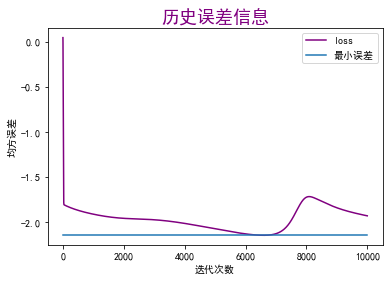

In [70]:
#损失值画图
# print(mse_history)
loss=np.log10(mse_history)
min_mse=min(loss)
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.plot(loss,color='purple',label='loss')
plt.plot([0,len(loss)],[min_mse,min_mse],label='最小误差')
plt.xlabel('迭代次数')
plt.ylabel('均方误差')
plt.title('历史误差信息',fontdict={'fontsize':18,'color':'purple'})
plt.legend()
plt.show()

In [63]:
#模型预测输出和实际输出对比图
hidden_out=sigmoid(np.dot(W1,sample_in)+b1)
network_out=np.dot(W2,hidden_out)+b2

In [64]:
#反转获取实际值：
network_out=y_scaler.inverse_transform(network_out.T)
sample_out=y_scaler.inverse_transform(y)

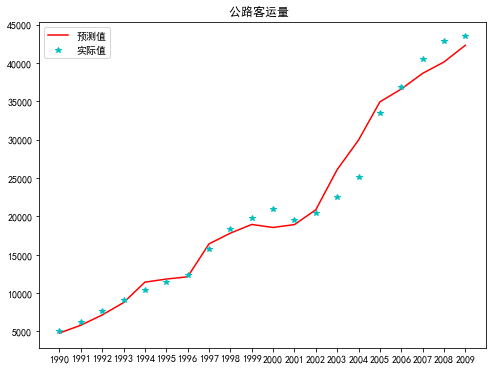

In [68]:
#解决图片中文无法显示
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(network_out[:,0],'r',label='预测值')
plt.plot(sample_out[:,0],'c*',label='实际值')
x_labels = range(1990,2010)
x_ticks=range(0,20)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title('公路客运量 ')
plt.legend()
plt.show()

In [19]:
for i in range(1990,2010):
    print(i)

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


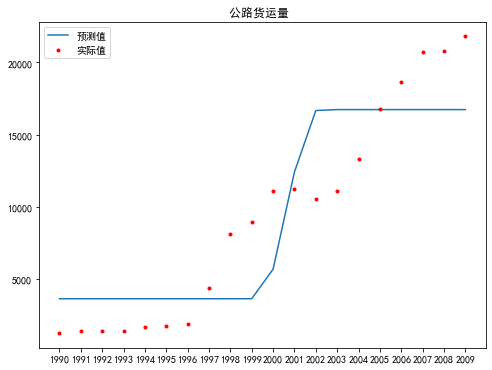

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(network_out[:,1],label='预测值')
plt.plot(sample_out[:,1],'r.',label='实际值')
plt.title('公路货运量 ')

x_labels = range(1990,2010)
x_ticks=range(0,20)
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.legend()
plt.show()

In [21]:
# 现在开始预测环节
PredictDataFrame = pd.read_csv('DataUnknown.csv',encoding='utf-8')

Pre_x=PredictDataFrame[['人数', '机动车数', '公路面积']]
Pre_y=PredictDataFrame[['公路客运量', '公路货运量']]

pre_x_scaler = MinMaxScaler(feature_range=(-1,1))
pre_y_scaler=MinMaxScaler(feature_range=(-1,1))

pre_x=pre_x_scaler.fit_transform(Pre_x)
pre_y=pre_y_scaler.fit_transform(Pre_y)

In [22]:
#对样本进行转置，矩阵运算
pre_in=pre_x.T
pre_out=pre_y.T

In [126]:
#模型预测输出值
hidden_out_pre = sigmoid(np.dot(W1,pre_in)+b1)
network_out_pre=np.dot(W2,hidden_out_pre)+b2

In [127]:
#翻转获取实际值
network_out_pre=pre_y_scaler.inverse_transform(network_out_pre.T)

In [128]:
network_out_pre

array([[55042.17912305, 30524.68660012],
       [56676.31972952, 32126.59363199]])